# Rappel du modèle linéaire

$$y \sim f_{\theta}(x)$$

avec comme fonction f une forme linéaire

$$f_{\theta}(x) = \theta_0 + \theta_1 x +\epsilon $$


### Hypothèses du modèle linéaire

* les erreurs suivent une loi normale de moyenne nulle
* la variance est la même pour tous (homoscédasticité) : la variance est la même pour l'ensemble des termes d'erreures gaussiens
$Var(\epsilon_i)=\sigma$
* les termes d'erreurs pour les différents $x_i$ sont indépendants les uns des autres


### Pourquoi régression ?

<img src='img/Galton-height-regress.png'>

# Generation des données

In [2]:
from random import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

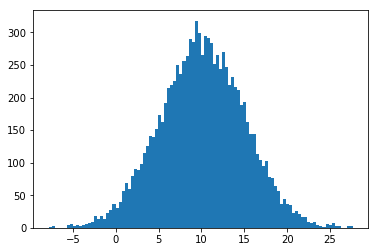

In [9]:
plt.hist(np.random.normal(10,5, size=10000), bins=100)
plt.show()

In [27]:
def linear(x, params=(0,1)):
    """Generate a linear function f(x)=a*x+b+N(0,1)
    
    Args:
        x (numpy.array()) : vector used to generate the output
        params (tuple of size 2) : b=params[0] and a=params[1]
    
    Returns:
        numpy.array()
    """
    return params[1]*x + params[0] + np.random.normal(size=x.shape[0])

In [28]:
n_samples = 1000
x = 10*np.random.random(n_samples)
y = linear(x, params=(0,1))

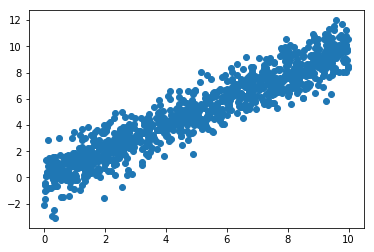

In [29]:
plt.scatter(x,y)
plt.show()

# Approche statistique / fit de modèle

In [30]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(slope, intercept)

0.986791489653 0.0603447477455


In [31]:
?stats.linregress

In [40]:
print(r_value)

0.941669965574


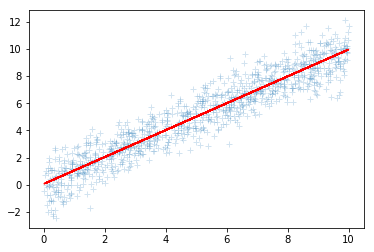

In [41]:
plt.plot(x, y, '+', alpha=0.2)
plt.plot(x, slope*x+intercept, 'r-')

# Approche Machine Learning

In [43]:
from sklearn import linear_model

n_split = 100

x = x.reshape(n_samples, 1)
y = y.reshape(n_samples, 1)

x_train = x[:n_split]
x_test = x[n_split:]

y_train = y[:n_split]
y_test = y[n_split:] 

In [44]:
regr = linear_model.LinearRegression() #instanciation du modèle
regr.fit(x_train, y_train)
print(regr.coef_, regr.intercept_)

[[ 0.99931555]] [ 0.03408055]


In [45]:
y_predict = regr.predict(x_test)

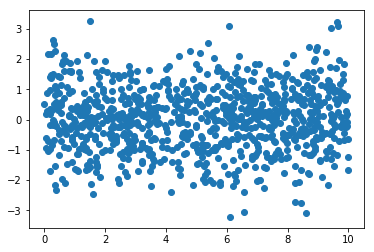

In [46]:
plt.scatter(x_test, y_predict-y_test)

(array([   5.,   27.,   66.,  138.,  200.,  223.,  144.,   72.,   19.,    6.]),
 array([-3.23852417, -2.58754762, -1.93657106, -1.28559451, -0.63461796,
         0.0163586 ,  0.66733515,  1.3183117 ,  1.96928826,  2.62026481,
         3.27124136]),
 <a list of 10 Patch objects>)

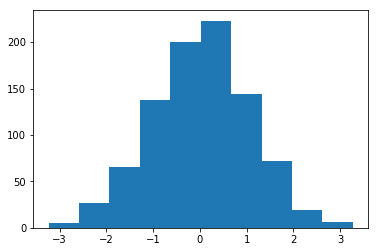

In [47]:
plt.hist(y_predict-y_test)